# Jupyter notebook to plot global SITRUS models

### import necessary libraries/modules; declare block and shell files, lat and lon systems
(don't need to modify)

In [1]:
import mod_input
import numpy as np
import pandas as pd
import mod_database
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

all_shells = pd.read_csv('shell_dimensions.csv')['SHELL#']
all_blocks = pd.read_csv('block_dimensions.csv')['BLOCK#']
y = np.arange(-90, 90, mod_input.reference_lat)
x = np.arange(-180, 180, mod_input.reference_lon)
lats = np.arange(-90, 90 + mod_input.reference_lat, mod_input.reference_lat)
lons = np.arange(-180, 180 + mod_input.reference_lon, mod_input.reference_lon)

### define variables for plotting
modify these according to desired final plot

In [14]:
# model info
model_to_plot = 'S40RTS_vsh' # name of model to plot (should match directory name in ./models/{wavetype}/{model}_update/
type_of_model = 'S' # either 'S' or 'P'
model_pid = 17182437 # PID of desired model
layer = 'layer_2_shell_2_to_31' # name of layer directory of model to plot
iteration = 'iteration_5' # name of iteration directory of model to plot

# plot construction
shells_to_plot = [2, 6, 13, 18, 21, 25, 30] # list of depth shells to plot
central_lon = 180. # longitude at which to center the map
coastline_transparency = 1. # alpha value for the coastlines

# hotspot plotting
shells_to_plot_hotspots = [] # leave empty if you don't want to plot hotspots in any shells
hotspot_color = 'green'
symbol_size = 50

# colorbar(s):
tomography_colormap = 'RdBu' #'seismic_r' #(colormap code from https://matplotlib.org/stable/users/explain/colors/colormaps.html)
hotspot_colormap = 'YlGn' #(colormap code from https://matplotlib.org/stable/users/explain/colors/colormaps.html)
perturbation_colorbar_max = 5. # maximum perturbation for the colorbar of the plotted models
perturbation_colorbar_min = -5. # minimum perturbation for the colorbar of the plotted models
colorbar_points = 'both' # 'neither', 'both', 'min', or 'max'. indication of the appearance of the ends of the colorbar
bar_val = 5.

# title/annotation info
model_title = f'{model_to_plot.split("_")[0]} updated with SITRUS' # title to display at the top of the plot
model_title_fontsize = 18.

## define boolean variables for saving the plot
modify these if to `True` to save the plots on disk.

figures will be saved to the following path with the indicated extension:
`./models/{type_of_model}/{model_to_plot}_update/{model_pid}_update/{model_to_plot}_{perturbation_colorbar_max}%_to_{perturbation_colorbar_min}%`

In [15]:
save_png = False # save the plot as a PNG file
save_svg = False # save the plot as an SVG file

## plot the model

CPU times: user 3.85 s, sys: 3.1 ms, total: 3.86 s
Wall time: 3.97 s


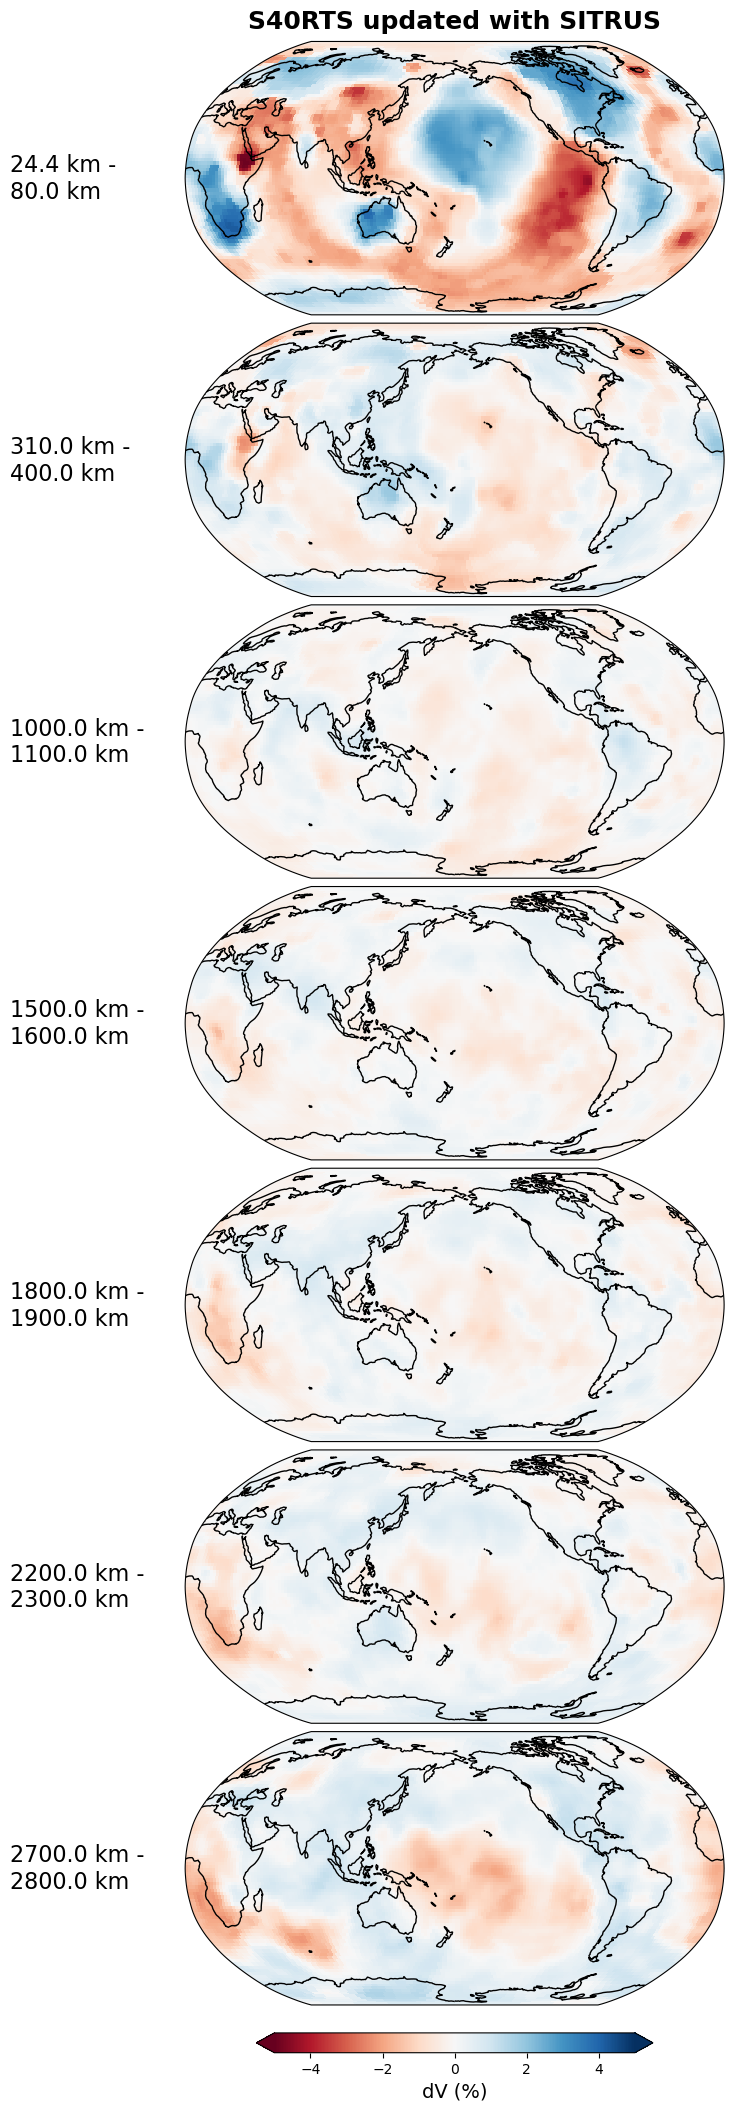

In [16]:
%%time
# define dimensions of the figure and each subplot
panel_height = 3
fig = plt.figure(figsize = (10, panel_height * len(shells_to_plot)), constrained_layout = True)
plot_idx = 1

# define the colormap
model_colormap = tomography_colormap

for shell_to_plot in shells_to_plot:
    shell_dims = mod_database.get_shell_info(shell_to_plot)
    shell_top_depth = shell_dims[1]
    shell_bottom_depth = shell_dims[3]
    
    df_shell = pd.read_csv(f'./models/{type_of_model}/{model_to_plot}_update/{model_pid}_update/{layer}/{iteration}/plot_files/{model_to_plot}_shell_{shell_to_plot}_updated_perturbs_plot_ready_{model_pid}.csv').drop(columns = ['LON'])
    dv = df_shell.T.to_numpy()

    ax1 = fig.add_subplot(len(shells_to_plot), 1, plot_idx, projection = ccrs.Robinson(central_longitude = central_lon))
    ax1.set_global()
    im1 = ax1.pcolormesh(lons, lats, dv, shading = 'flat', transform = ccrs.PlateCarree(), cmap = model_colormap, vmin = -bar_val, vmax = bar_val)
    ax1.coastlines(alpha = coastline_transparency)
    if shell_to_plot in shells_to_plot_hotspots:
        lon = df_hotspots.Lon
        lat = df_hotspots.Lat
        sc = ax1.scatter(lon, lat, transform = ccrs.PlateCarree(), s = symbol_size, c = hotspot_color)
    ax1.annotate(f'{shell_top_depth} km - \n{shell_bottom_depth} km', va = 'center', xy = (-0.325, 0.5), xycoords = 'axes fraction', fontsize = 16)
    plot_idx += 1
    
fig.suptitle(f'{model_title}', fontsize = 18, fontweight = 'bold')

# tomography colorbar info:
cbar_tomo = fig.colorbar(im1, orientation = 'horizontal', ax = ax1, shrink = 0.4, pad = 0.1, extend = colorbar_points)
cbar_tomo.ax.set_xlabel('dV (%)', size = 14)
if type_of_model == 'S':
    cbar_tomo.ax.set_xlabel('dV (%)', size = 14)
elif type_of_model == 'P':
    cbar_tomo.ax.set_xlabel('dV (%)', size = 14)

if save_png == True:
    fig.savefig(f'./models/{type_of_model}/{model_to_plot}_update/{model_pid}_update/{model_to_plot}_{perturbation_colorbar_max}%_to_{perturbation_colorbar_min}%.png')
if save_svg == True:
    fig.savefig(f'./models/{type_of_model}/{model_to_plot}_update/{model_pid}_update/{model_to_plot}_{perturbation_colorbar_max}%_to_{perturbation_colorbar_min}%.svg')
